In [1]:
import numpy as np
import pandas as pd
from scipy import signal, fft
import matplotlib.pyplot as plt

In [2]:
def load(file, tnoise=200):
    # Load:
    x = pd.read_csv(file, header=None)
    x = x.values.reshape((x.size // 2, 2))
    x = pd.DataFrame(x, columns=["x", "t"])
    x = x.set_index("t")
    # Baseline center:
    xn = x.loc[x.index > tnoise, "x"].mean()
    x -= xn
    # Missing zero time:
    x.loc[0., "x"] = 0.
    x = x.sort_index()
    return x

In [3]:
xraw = load("105rpm_dirac.data")
yraw = load("105rpm.data")

In [4]:
xraw

,x
t,
0.000,0.000000
0.195,0.000089
0.237,0.000081
0.302,0.000092
0.402,0.000074
...,...
239.635,-0.000004
239.750,-0.000005
239.802,-0.000006


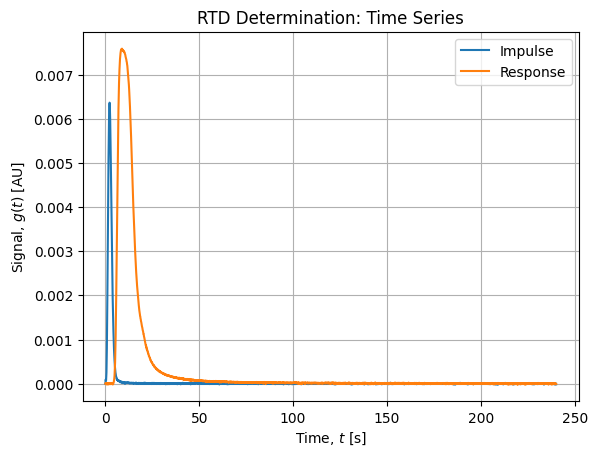

In [5]:
fig, axe = plt.subplots()
xraw.plot(ax=axe)
yraw.plot(ax=axe)
axe.set_title("RTD Determination: Time Series")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

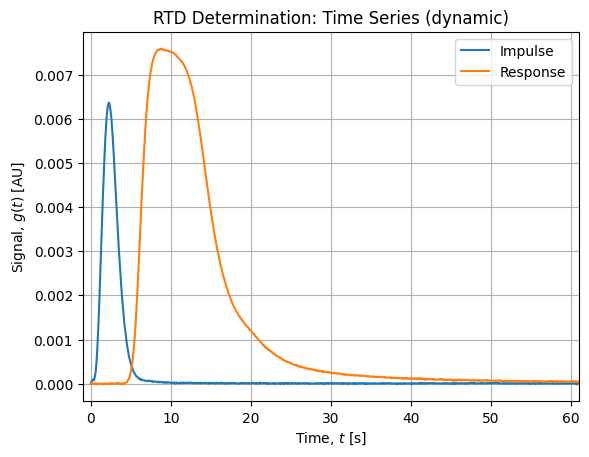

In [6]:
fig, axe = plt.subplots()
xraw.plot(ax=axe)
yraw.plot(ax=axe)
axe.set_xlim([-1, 61])
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

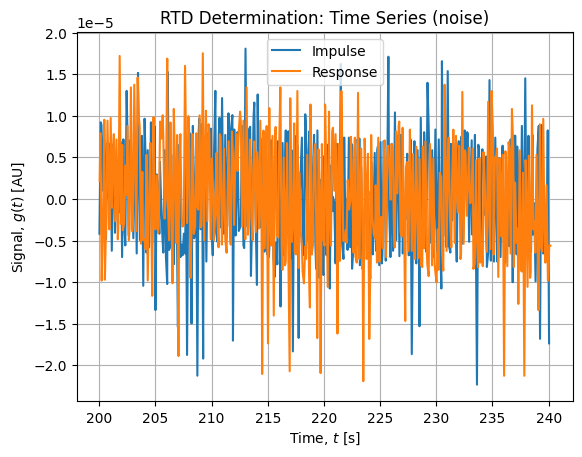

In [7]:
fig, axe = plt.subplots()
xraw.loc[xraw.index > 200, :].plot(ax=axe)
yraw.loc[yraw.index > 200, :].plot(ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

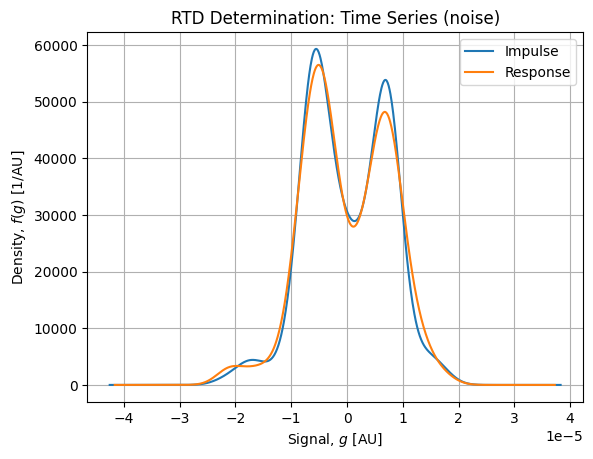

In [8]:
fig, axe = plt.subplots()
xraw.loc[xraw.index > 200, "x"].plot(kind="kde", ax=axe)
yraw.loc[yraw.index > 200, "x"].plot(kind="kde", ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Signal, $g$ [AU]")
axe.set_ylabel("Density, $f(g)$ [1/AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

In [9]:
def resample(x, space):
    idx = list(sorted(set(x.index) | set(space)))
    xnew = x.reindex(idx).interpolate()
    return xnew.loc[space, :]

In [10]:
t = np.arange(0, 240.01, 0.005)
dt = np.diff(t)[0]
fs = 1/dt

In [11]:
xr = resample(xraw, t)
yr = resample(yraw, t)

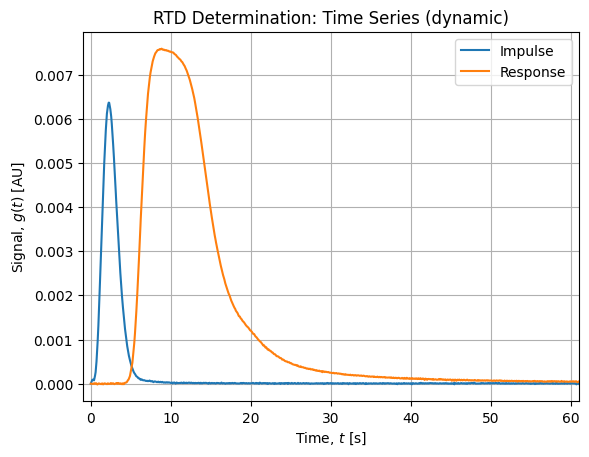

In [12]:
fig, axe = plt.subplots()
xr.plot(ax=axe)
yr.plot(ax=axe)
axe.set_xlim([-1, 61])
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

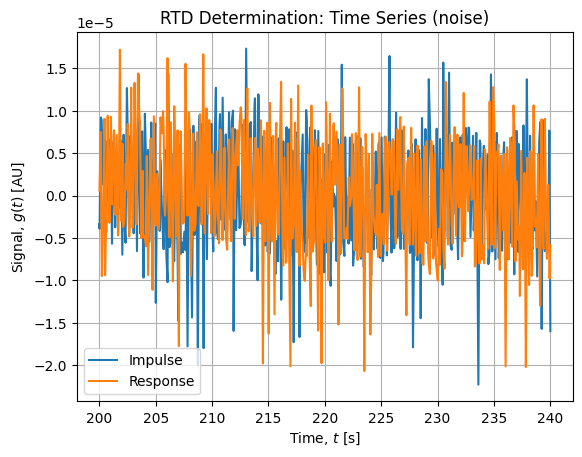

In [13]:
fig, axe = plt.subplots()
xr.loc[xr.index > 200, :].plot(ax=axe)
yr.loc[yr.index > 200, :].plot(ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

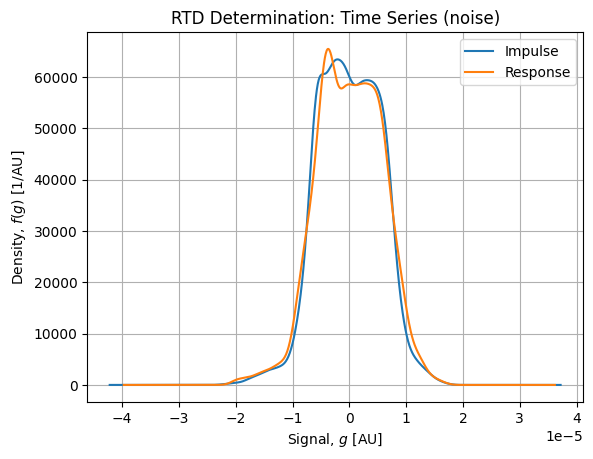

In [14]:
fig, axe = plt.subplots()
xr.loc[xr.index > 200, "x"].plot(kind="kde", ax=axe)
yr.loc[yr.index > 200, "x"].plot(kind="kde", ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Signal, $g$ [AU]")
axe.set_ylabel("Density, $f(g)$ [1/AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

In [15]:
def smooth(x, size=4*60, order=3, dt=dt):
    x["xs"] = signal.savgol_filter(x["x"].values, size, order, mode="nearest")
    x["dxsdt"] = signal.savgol_filter(x["x"].values, size, order, mode="nearest", delta=dt, deriv=1)
    x["dx"] = x["x"] - x["xs"]
    x["rdx"] = x["dx"]/x["xs"]
    x["xs_"] = x["xs"]
    return x

In [16]:
xs = smooth(xr)
ys = smooth(yr)

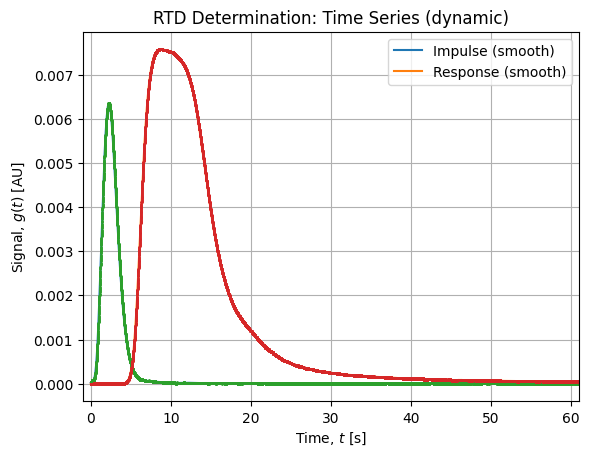

In [17]:
fig, axe = plt.subplots()
xs["xs"].plot(ax=axe)
ys["xs"].plot(ax=axe)
xs["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
ys["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
axe.set_xlim([-1, 61])
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)"])
axe.grid()

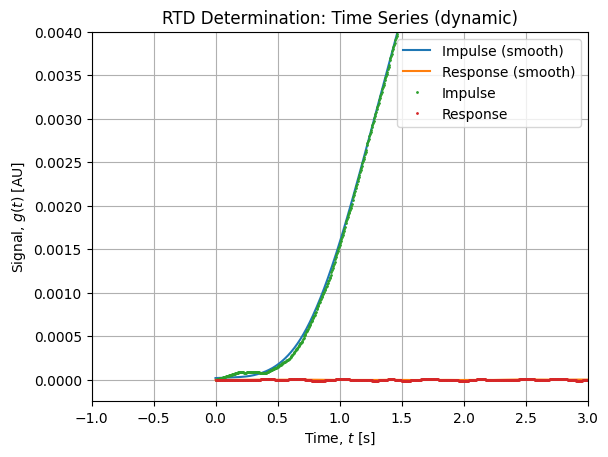

In [18]:
fig, axe = plt.subplots()
xs["xs"].plot(ax=axe)
ys["xs"].plot(ax=axe)
xs["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
ys["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)", "Impulse", "Response", ])
axe.set_xlim([-1, 3])
axe.set_ylim([-0.00025, 0.004])
axe.grid()

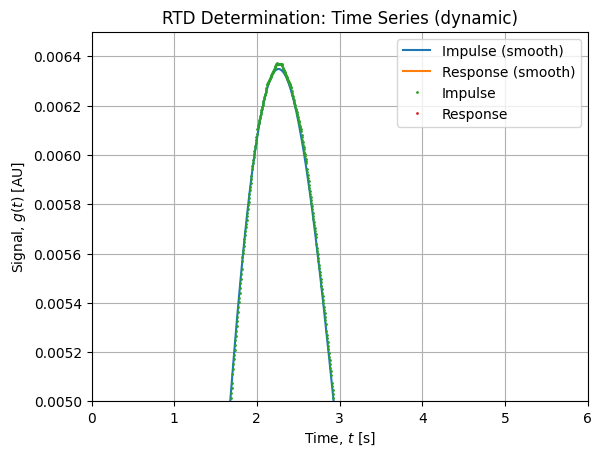

In [19]:
fig, axe = plt.subplots()
xs["xs"].plot(ax=axe)
ys["xs"].plot(ax=axe)
xs["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
ys["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)", "Impulse", "Response", ])
axe.set_xlim([0, 6])
axe.set_ylim([0.005, 0.0065])
axe.grid()

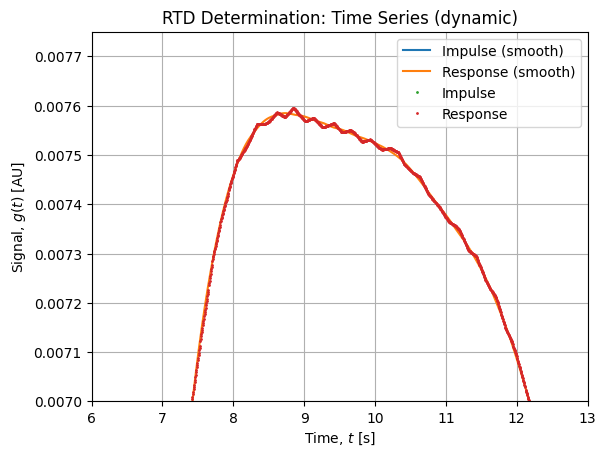

In [20]:
fig, axe = plt.subplots()
xs["xs"].plot(ax=axe)
ys["xs"].plot(ax=axe)
xs["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
ys["x"].plot(linestyle="none", marker=".", markersize=2, ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)", "Impulse", "Response", ])
axe.set_xlim([6, 13])
axe.set_ylim([0.007, 0.00775])
axe.grid()

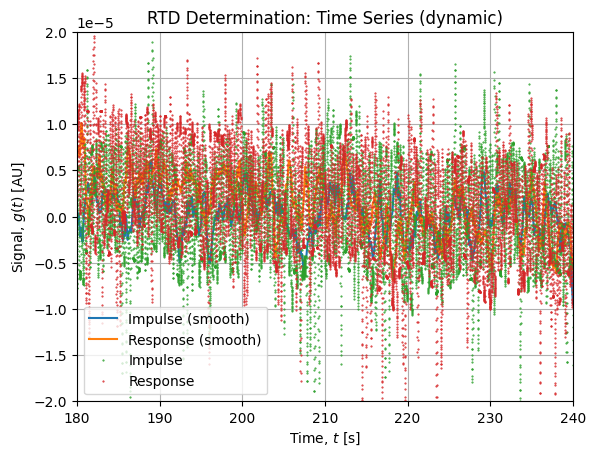

In [21]:
fig, axe = plt.subplots()
xs["xs"].plot(ax=axe)
ys["xs"].plot(ax=axe)
xs["x"].plot(linestyle="none", marker=".", markersize=1, ax=axe)
ys["x"].plot(linestyle="none", marker=".", markersize=1, ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)", "Impulse", "Response",])
axe.set_xlim([180, 240])
axe.set_ylim([-2e-5, 2e-5])
axe.grid()

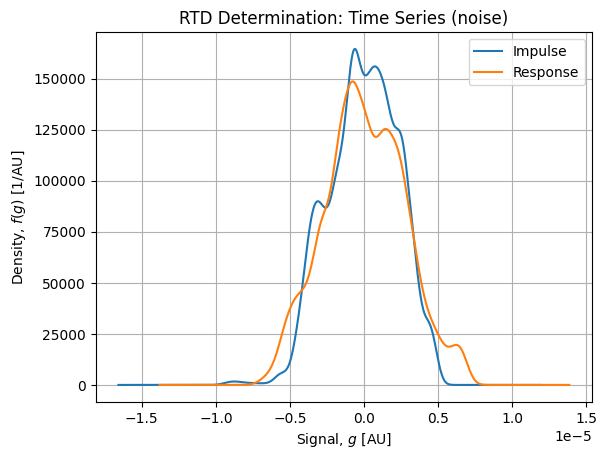

In [22]:
fig, axe = plt.subplots()
xs.loc[xs.index > 200, "xs"].plot(kind="kde", ax=axe)
ys.loc[ys.index > 200, "xs"].plot(kind="kde", ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Signal, $g$ [AU]")
axe.set_ylabel("Density, $f(g)$ [1/AU]")
axe.legend(["Impulse", "Response"])
axe.grid()

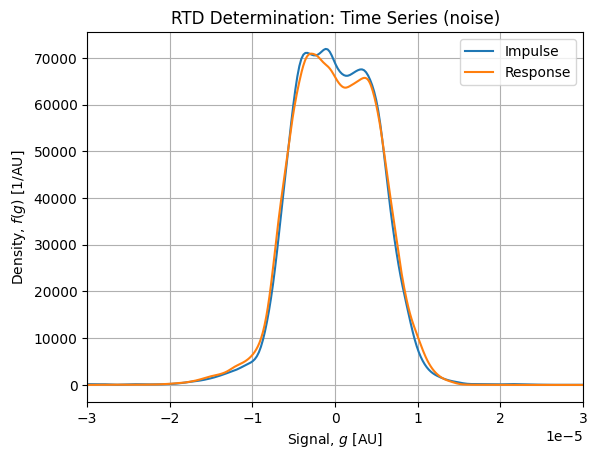

In [23]:
fig, axe = plt.subplots()
xs.loc[:, "dx"].plot(kind="kde", ax=axe)
ys.loc[:, "dx"].plot(kind="kde", ax=axe)
axe.set_title("RTD Determination: Time Series (noise)")
axe.set_xlabel("Signal, $g$ [AU]")
axe.set_ylabel("Density, $f(g)$ [1/AU]")
axe.set_xlim([-3e-5, 3e-5])
axe.legend(["Impulse", "Response"])
axe.grid()

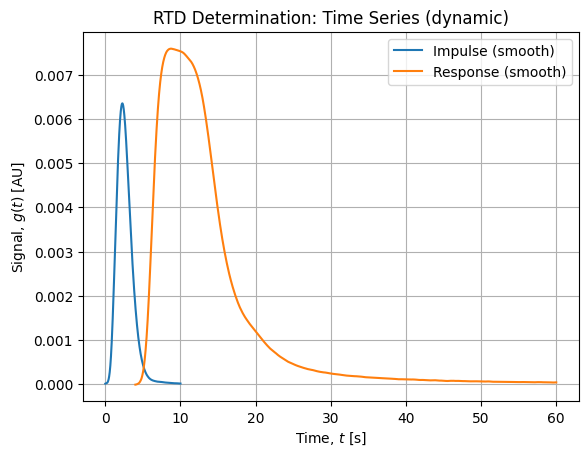

In [24]:
fig, axe = plt.subplots()
xs.loc[0:10, "xs"].plot(ax=axe)
ys.loc[4:60, "xs"].plot(ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)"])
axe.grid()

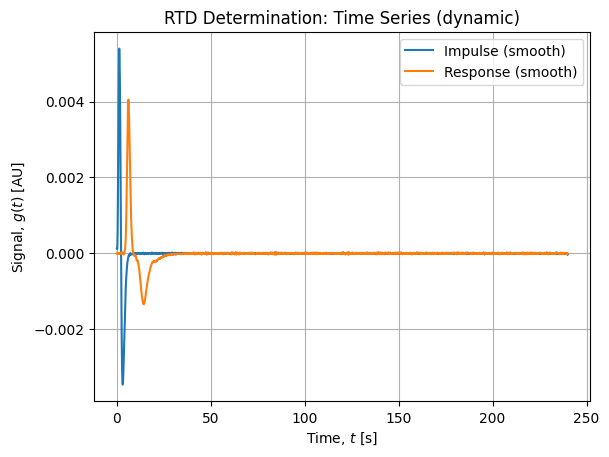

In [25]:
fig, axe = plt.subplots()
xs["dxsdt"].plot(ax=axe)
ys["dxsdt"].plot(ax=axe)
axe.set_title("RTD Determination: Time Series (dynamic)")
axe.set_xlabel("Time, $t$ [s]")
axe.set_ylabel("Signal, $g(t)$ [AU]")
axe.legend(["Impulse (smooth)", "Response (smooth)"])
axe.grid()

In [26]:
fx, Px = signal.welch(xs.loc[0:10, "xs"], fs=fs)
fy, Py = signal.welch(ys.loc[4:60, "xs"], fs=fs)

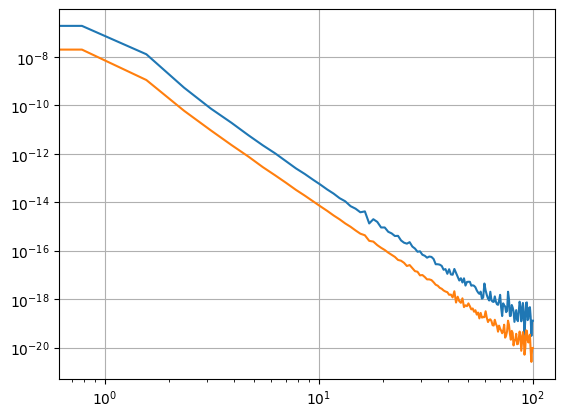

In [27]:
fig, axe = plt.subplots()
axe.loglog(fx, Px)
axe.loglog(fy, Py)
axe.grid()

In [28]:
N = 2**12
N

4096

In [112]:
ws = int(0.75*N)
W = fft.fft(np.hamming(ws), n=N)/ws*2

In [113]:
X = fft.fft(xs.loc[0:10, "xs"].values, n=N)
Y = fft.fft(ys.loc[4:60, "xs"].values, n=N)

In [114]:
X *= W
Y *= W

In [115]:
G = (Y**2)/(X**2 + 1e-6)

In [116]:
g = np.real(fft.ifft(G))

In [117]:
g -= g.min()

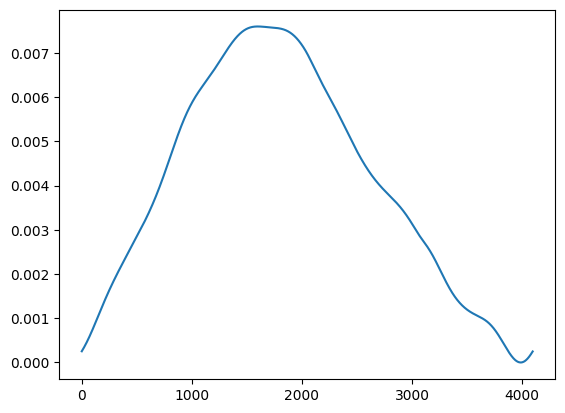

In [118]:
fig, axe = plt.subplots()
axe.plot(g)

In [119]:
yc = signal.convolve(g, xs.loc[0:10, "xs"].values)
yc

array([4.74666868e-09, 9.65849923e-09, 1.47328174e-08, ...,
       1.53654053e-08, 1.03281092e-08, 5.20700825e-09])

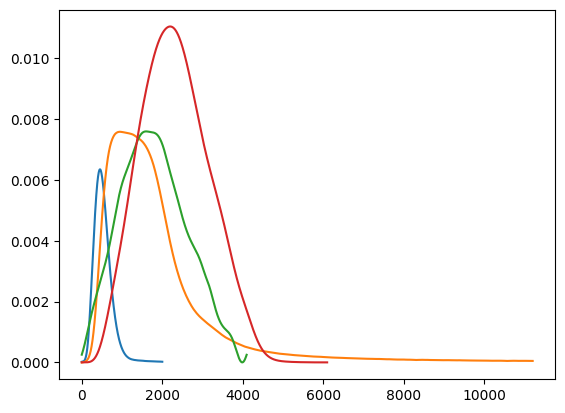

In [120]:
fig, axe = plt.subplots()
axe.plot(xs.loc[0:10, "xs"].values)
axe.plot(ys.loc[4:60, "xs"].values)
axe.plot(g)
axe.plot(yc/2)